In [2]:
%matplotlib inline
from __future__ import division
from ghgforcing import CO2, CH4
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Example uses of ghgforcing

Define the time axis along which all emissions and calculations take place, from year 0 to 100. The time-step (tstep) is set to 0.01 years to improve the accuracy of calcuations.

In [3]:
tstep = 0.01
time = np.linspace(0, 100, 100/tstep+1)

## Deterministic results

### Start with a pulse emission of CO<sub>2</sub>

In [4]:
co2_emission = np.zeros_like(time)
co2_emission[0] = 1

In [5]:
co2_forcing = CO2(co2_emission, time, kind='RF')

The `CO2` and `CH4` functions return values at 1-year timesteps - 101 values from year 0 to 100. The calculations are done at a default time-step of 0.01 years, but that level of detail seems unnecessary and burdensome for an output.

In [6]:
co2_forcing.size

101

Having the outputs on an annual basis makes it really easy to plot.

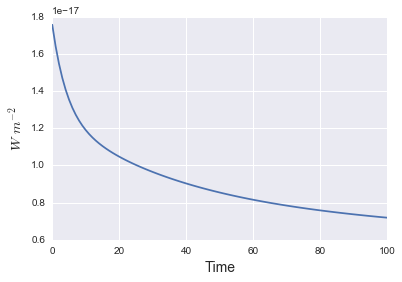

In [7]:
plt.plot(co2_forcing)
plt.xlabel('Time', size=14)
plt.ylabel('$W \ m^{-2}$', size=14)

### Pulse emissions of fossil CH<sub>4</sub> with and non-fossil CH<sub>4</sub> without climate-carbon feedbacks.

In [9]:
ch4_emission = co2_emission.copy()

In [15]:
ch4_forcing_with = CH4(ch4_emission, time, kind='RF', cc_fb=True)
ch4_forcing_without = CH4(ch4_emission, time, kind='RF', 
                          cc_fb=False, decay=False)

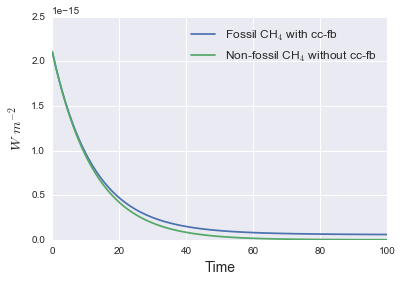

In [19]:
plt.plot(ch4_forcing_with, label = 'Fossil CH$_4$ with cc-fb')
plt.plot(ch4_forcing_without, label = 'Non-fossil CH$_4$ without cc-fb')
plt.xlabel('Time', size=14)
plt.ylabel('$W \ m^{-2}$', size=14)
plt.legend(fontsize=12)

### Continuous CO<sub>2</sub> emissions - 1kg/year
Emissions at each time-step should be equal to the annual emission rate.

In [20]:
co2_cont = np.ones_like(time)
co2_cont_rf = CO2(co2_cont, time)

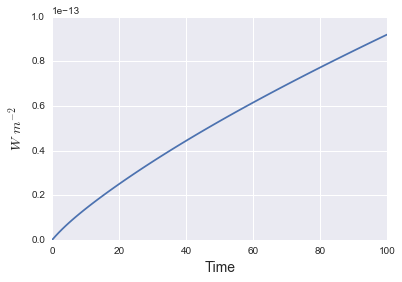

In [21]:
plt.plot(co2_cont_rf)
plt.xlabel('Time', size=14)
plt.ylabel('$W \ m^{-2}$', size=14)

## Stochastic (Monte Carlo) results
Just using the continuous CO<sub>2</sub> emissions scenario.

### Mean and +/- 1 sigma
When *full_output* is False, the functions return a Pandas DataFrame

In [22]:
runs = 500

In [23]:
co2_cont_mc = CO2(co2_cont, time, kind='RF',
                 runs=runs, full_output=False)

In [24]:
co2_cont_mc.head()

,mean,-sigma,+sigma
0,1.732239e-17,1.612672e-17,1.851805e-17
1,1.663821e-15,1.545853e-15,1.781789e-15
2,3.189961e-15,2.956823e-15,3.423099e-15
3,4.638858e-15,4.291089e-15,4.986627e-15
4,6.032293e-15,5.569073e-15,6.495513e-15


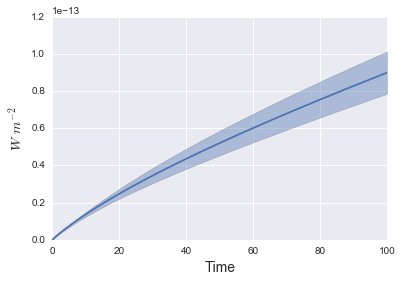

In [25]:
plt.plot(co2_cont_mc['mean'])
plt.fill_between(x=np.arange(0,101), 
                 y1=co2_cont_mc['+sigma'],
                 y2=co2_cont_mc['-sigma'],
                 alpha=0.4)
plt.xlabel('Time', size=14)
plt.ylabel('$W \ m^{-2}$', size=14)

### Full Monte Carlo in addition to mean and +/- 1 sigma
When *full_output* is True, the functions return a Pandas DataFrame with the mean and +/- 1 sigma, and a numpy array with the full Monte Carlo results.

In [26]:
co2_cont_mc, co2_cont_full = CO2(co2_cont, time, kind='RF',
                                 runs=runs, full_output=True)

The *co2_cont_mc* results are the same as above

In [27]:
co2_cont_mc.head()

,mean,-sigma,+sigma
0,1.732239e-17,1.612672e-17,1.851805e-17
1,1.663821e-15,1.545853e-15,1.781789e-15
2,3.189961e-15,2.956823e-15,3.423099e-15
3,4.638858e-15,4.291089e-15,4.986627e-15
4,6.032293e-15,5.569073e-15,6.495513e-15


I'm putting the *co2_cont_full* into a DataFrame just to make showing some of the results easier.

In [49]:
df = pd.DataFrame(co2_cont_full)

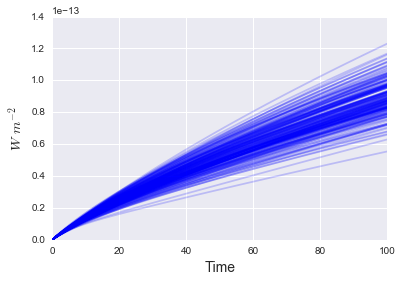

In [51]:
df.loc[:,:200].plot(legend=False, c='b', alpha=0.2)
plt.xlabel('Time', size=14)
plt.ylabel('$W \ m^{-2}$', size=14)